In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime as dt

In [22]:
# Read the datasets from Bitcoin, Ethereum, and Cardano
btc = pd.read_csv('Data/coin_Bitcoin.csv')
eth = pd.read_csv('Data/coin_Ethereum.csv')
ada = pd.read_csv('Data/coin_Cardano.csv')

In [ ]:
print(btc.info(),eth.info(),sol.info())

# Preprocessing


In [14]:
def preprocess(crypto_df):
    crypto_df = crypto_df.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap','Volume'], axis=1)
    crypto_df['Date'] = crypto_df['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d %H:%M:%S'))
    crypto_df = crypto_df.rename(columns={'Date':'ds','Close':'y'})
    return crypto_df

In [15]:
prophet_btc = preprocess(btc)
prophet_btc.head()

,ds,y
0,2013-04-29 23:59:59,144.539993
1,2013-04-30 23:59:59,139.000000
2,2013-05-01 23:59:59,116.989998
3,2013-05-02 23:59:59,105.209999
4,2013-05-03 23:59:59,97.750000


In [19]:
prophet_eth = preprocess(eth)
prophet_eth.head()

,ds,y
0,2015-08-08 23:59:59,0.753325
1,2015-08-09 23:59:59,0.701897
2,2015-08-10 23:59:59,0.708448
3,2015-08-11 23:59:59,1.067860
4,2015-08-12 23:59:59,1.217440


In [26]:
prophet_ada = preprocess(ada)
prophet_ada.head()

,ds,y
0,2017-10-02 23:59:59,0.025932
1,2017-10-03 23:59:59,0.020816
2,2017-10-04 23:59:59,0.021931
3,2017-10-05 23:59:59,0.021489
4,2017-10-06 23:59:59,0.018539


# Prophet ML Model

In [27]:
def prophet(prophet_df):
    m = Prophet()
    m.fit(prophet_df)
    future = m.make_future_dataframe(periods=365)
    forecast = m.predict(future)
    forecast_df = forecast[['ds','yhat','yhat_lower','yhat_upper']]
    predict_graph = m.plot(forecast)
    component_graph = m.plot_components(forecast)
    
    return forecast_df, predict_graph, component_graph

## Bitcoin

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


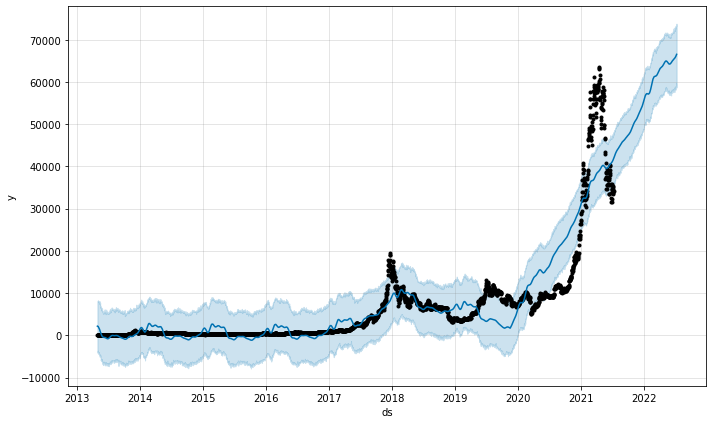

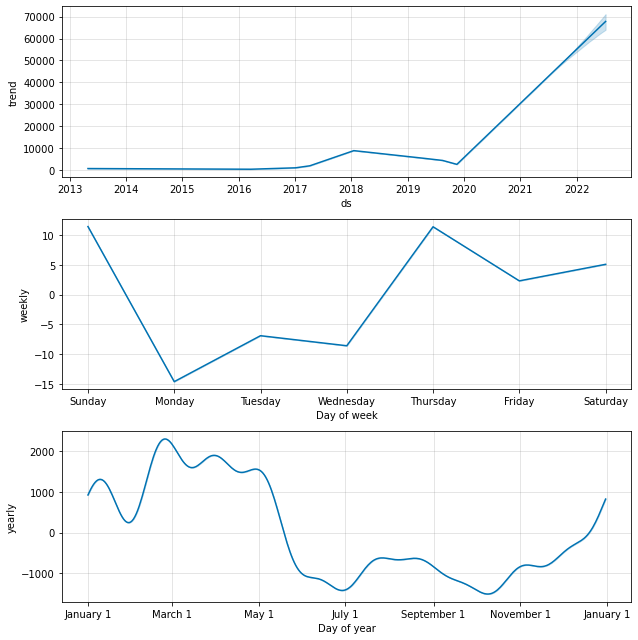

In [28]:
btc_forecast, btc_predictions, btc_components = prophet(prophet_btc)

In [29]:
btc_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2013-04-29 23:59:59,2167.627790,-3772.306346,8031.295203
1,2013-04-30 23:59:59,2154.778984,-4123.009981,8168.866768
2,2013-05-01 23:59:59,2155.928655,-3618.566466,8138.529235
3,2013-05-02 23:59:59,2119.481339,-4273.298352,8297.563745
4,2013-05-03 23:59:59,2085.773684,-3867.849611,8177.220304
...,...,...,...,...
3351,2022-07-02 23:59:59,66179.561541,58452.298537,73179.919778
3352,2022-07-03 23:59:59,66245.255164,59756.111792,73469.850316
3353,2022-07-04 23:59:59,66349.691406,58996.977717,73219.395319
3354,2022-07-05 23:59:59,66449.262728,58688.142196,73844.674538


## Ethereum

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


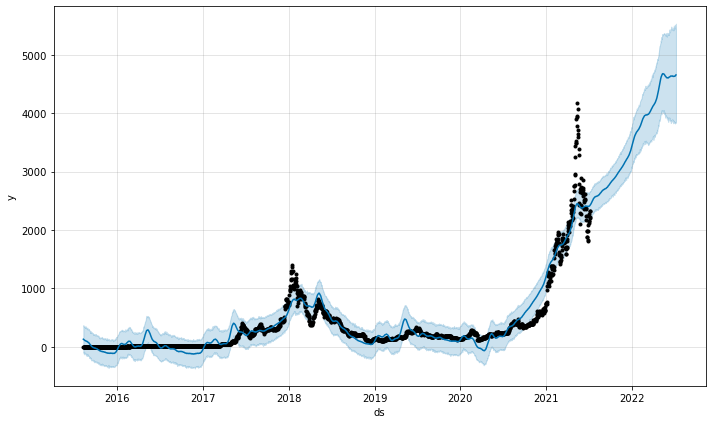

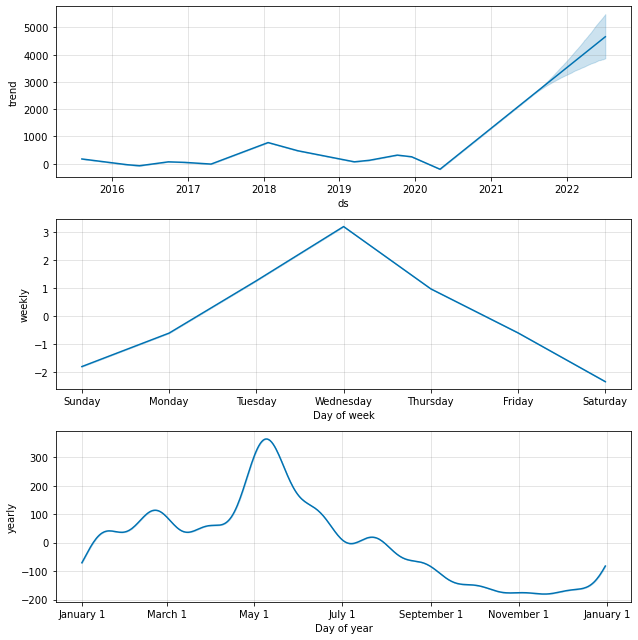

In [31]:
eth_forecast, eth_predictions, eth_components = prophet(prophet_eth)

In [32]:
eth_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2015-08-08 23:59:59,129.989037,-99.365228,370.727177
1,2015-08-09 23:59:59,126.593707,-90.046793,360.614946
2,2015-08-10 23:59:59,124.221380,-120.223159,345.567652
3,2015-08-11 23:59:59,122.279069,-107.590717,350.230209
4,2015-08-12 23:59:59,116.540900,-130.635005,343.429521
...,...,...,...,...
2520,2022-07-02 23:59:59,4635.845724,3823.070037,5493.752561
2521,2022-07-03 23:59:59,4640.338967,3844.624230,5517.172981
2522,2022-07-04 23:59:59,4646.229091,3833.575702,5518.233573
2523,2022-07-05 23:59:59,4652.902860,3842.273575,5447.738819


## Cardano (ADA)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


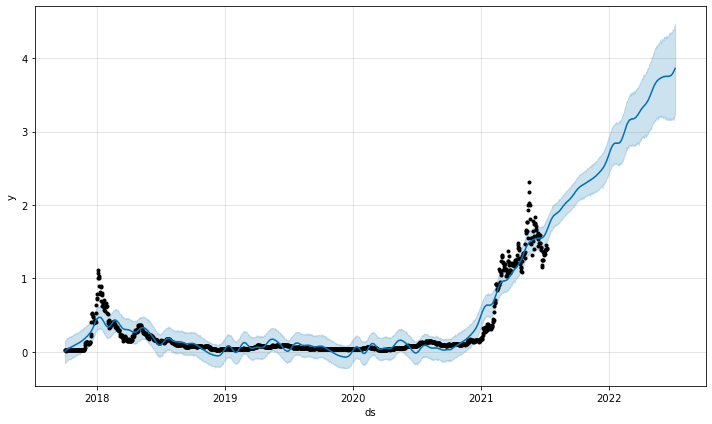

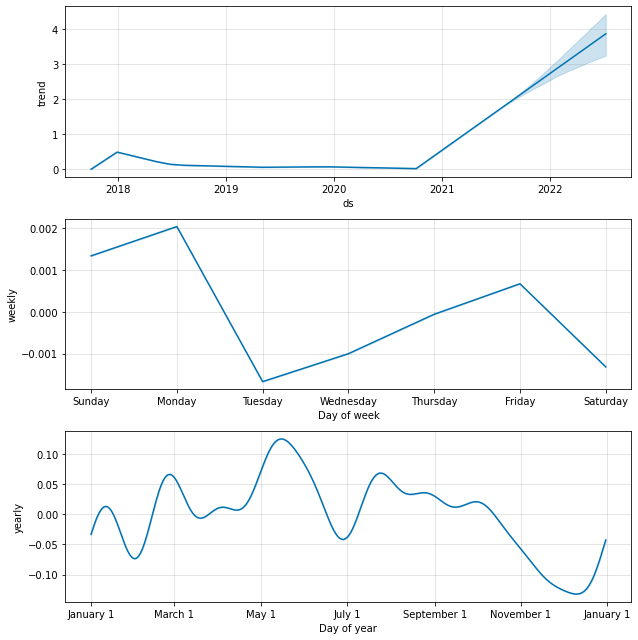

In [33]:
ada_forecast, ada_predictions, ada_components = prophet(prophet_ada)

In [34]:
ada_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-02 23:59:59,0.009185,-0.157092,0.156919
1,2017-10-03 23:59:59,0.014537,-0.135999,0.157627
2,2017-10-04 23:59:59,0.019885,-0.139076,0.161264
3,2017-10-05 23:59:59,0.024745,-0.135937,0.172488
4,2017-10-06 23:59:59,0.026620,-0.125292,0.176500
...,...,...,...,...
1734,2022-07-02 23:59:59,3.816856,3.196679,4.391689
1735,2022-07-03 23:59:59,3.827469,3.173447,4.388272
1736,2022-07-04 23:59:59,3.834306,3.208069,4.436154
1737,2022-07-05 23:59:59,3.846097,3.228451,4.424982
